# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
from scipy.optimize import newton


def biseccion(a, b, f, p_0, e, it):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs to apply bisection.")
    
    p = p_0

    while True:
        it += 1
        p_old = p
        
        p = (a + b) / 2.0
        
        if (np.abs(p - p_old) < e) or (np.abs(f(p)) < e):
            return p, it
        
        if f(a) * f(p) < 0:
            b = p
        else:
            a = p

5499.999999999901 1.8207657603852567e-14
0.17314022047131417 -12012406.67782146
El resultado es 258.640892704246m
El tiempo es 9.633451183030235s


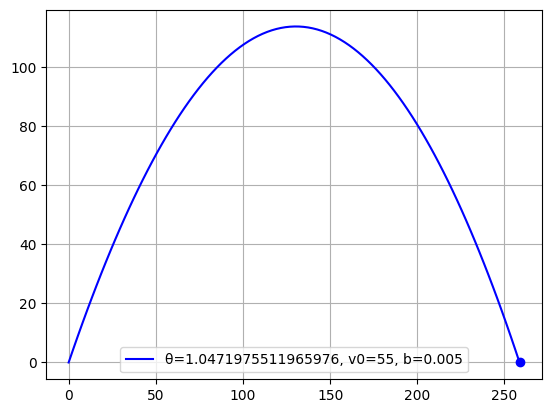

In [113]:
g = 9.81


def setup(v0, theta, b):

    v0x = np.cos(theta) * v0
    v0y = np.sin(theta) * v0

    x = lambda t: (v0x / b) * (1 - np.exp(-b * t))
    y = lambda t: (1 / b) * (g / b + v0y) * (1 - np.exp(-b * t)) - (g / b) * t
    vx = lambda t: v0x * np.exp(-b * t)
    vy = lambda t: ((g / b) + v0y) * np.exp(-b * t) - (g / b)

    return x, y, vx, vy, v0x, v0y


def f(theta, v0, b, color="b"):
    x, y, vx, vy, v0x, v0y = setup(v0, theta, b)
    t = lambda R: (-1 / b) * np.log(1 - ((R * b) / v0x))
    yf = lambda R: ((g / b) + v0y) * (R / v0x) + (g / (b**2)) * np.log(
        1 - ((R * b) / v0x)
    )
    Rmax =  (v0x / b) - 1e-10 
    print(Rmax, 1-((Rmax * b) / v0x))
    resultado = bisect(yf, 1, Rmax, xtol=1e-16)
    # resultado_newton = newton(yf, Rmax - 1)
    # print(f"El resultado con newton es {resultado_newton}m")
    print(f"El resultado es {resultado}m")
    print(f"El tiempo es {t(resultado)}s")
    plt.plot([resultado], [yf(resultado)], color + "o")
    plt.plot(
        x(np.linspace(0, t(resultado), 100)),
        y(np.linspace(0, t(resultado), 100)),
        color=color,
        label=f"θ={theta}, v0={v0}, b={b}",
    )
    return yf, resultado, t, x(np.linspace(0, t(resultado), 100)), 


yf, resultado, t, x = f(np.pi / 3, 55, 0.005, "b")
plt.legend()
plt.grid(True)
plt.show()

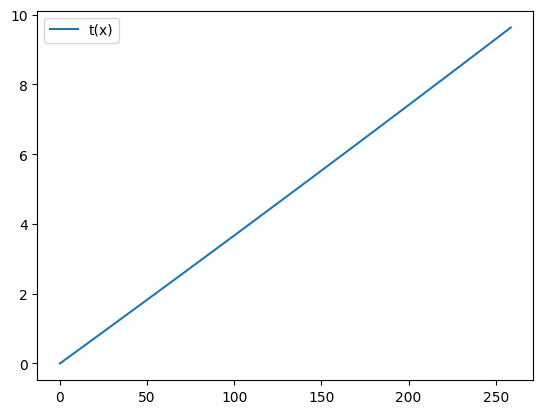

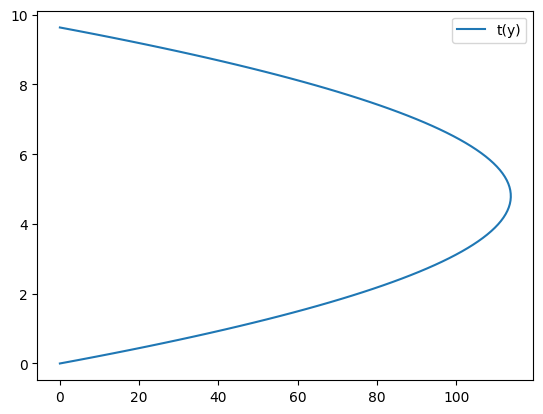

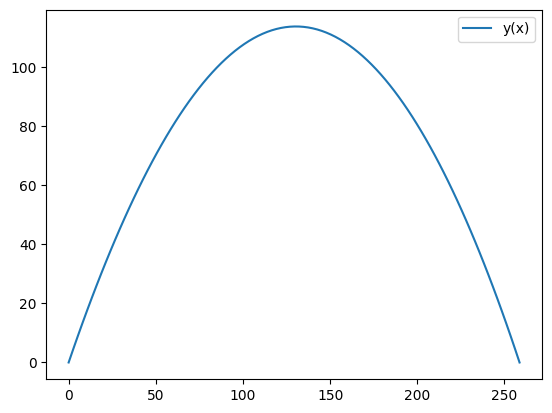

In [74]:
plt.plot(x, t(x), label="t(x)")
plt.legend()
plt.show()
plt.plot(yf(x), t(x), label="t(y)")
plt.legend()
plt.show()
plt.plot(x, yf(x), label="y(x)")
plt.legend()
plt.show()

4427.531991518769 2.2648549702353193e-14
0.008717974984064458 -3683652.844216441
El resultado es 28.201493707540386m
El tiempo es 0.7099940588673782s
4376.923346720824 2.2870594307278225e-14
0.017601088199423742 -3682086.8522067503
El resultado es 55.31263716060918m
El tiempo es 1.4130959012813467s
4293.003672395759 2.3314683517128287e-14
0.026762061468756926 -3679379.1834068815
El resultado es 80.52802787481804m
El tiempo es 2.10401452605416s
4176.4116479372715 2.398081733190338e-14
0.03636230545663066 -3675597.594537701
El resultado es 103.1088218805874m
El tiempo es 2.777582764883614s
4028.0346090516773 2.4868995751603507e-14
0.046593442965610965 -3670834.8548840503
El resultado es 122.40334799010103m
El tiempo es 3.428793572145999s
3849.001794597406 2.5868196473766147e-14
0.05769415120584753 -3665720.078506829
El resultado es 137.8646719470688m
El tiempo es 4.052834314725751s
3640.675752395419 2.7533531010703882e-14
0.0699750662662928 -3657836.914463801
El resultado es 149.06473133

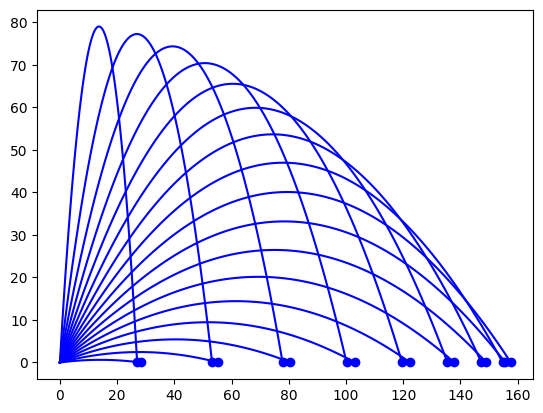

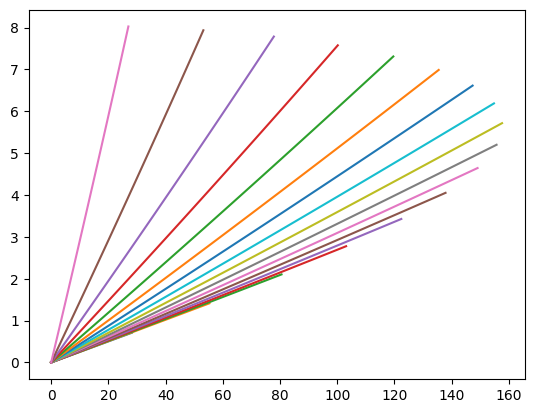

In [121]:
v0 = 40
b = 0.009
theta = np.arange(5,90, 5)
theta = np.deg2rad(theta)
data = []
for angle in theta:
    yf, Rmax, t, x  = f(angle, v0,b)
    data.append((x,t))
plt.show()
for value in data:
    plt.plot(value[0], value[1](value[0]))
